# Compound screening in drug discovery


## Step 1) Importing dataset

In [1]:
import pandas as pd

In [2]:
df_active=pd.read_csv('smiles/df_active.csv', header=0)

In [3]:
df_inactive=pd.read_csv('smiles/df_inactive.csv', header=0)

In [4]:
df_active.head()

,cid,class,smiles
0,31307,1,C[C@]12C[C@@H]([C@]3([C@H]([C@@H]1C[C@H]([C@@]...
1,5074,1,CC1=C(C(=O)N2C=CSC2=N1)CCN3CCC(=C(C4=CC=C(C=C4...
2,5754,1,C[C@]12CCC(=O)C=C1CC[C@@H]3[C@@H]2[C@H](C[C@]4...
3,2708,1,C1=CC(=CC=C1CCCC(=O)O)N(CCCl)CCCl
4,2284,1,C1=CC(=CC=C1C(CC(=O)O)CN)Cl


In [5]:
df1=df_active

In [6]:
df2=df_inactive

In [7]:
df=pd.concat([df1, df2])

## Step 2) Getting chemical fingerprints from chemical structures (smiles) with rdkit

### Fingerprint
- Apply a kernel to a molecule to generate a bit vector.
- Each fingerprint bit corresponds to a fragment of the molecule.
- Molecules that are similar have a lot of fragments in common.

In [8]:
conda install -c rdkit rdkit

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Asus\anaconda3

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.5.25  |       haa95532_1         112 KB
    certifi-2021.5.30          |   py37haa95532_0         139 KB
    conda-4.10.1               |   py37haa95532_1         2.9 MB
    openssl-1.1.1k             |       h2bbff1b_0         4.8 MB
    rdkit-2020.09.1.0          |   py37h3d1ada6_1        48.8 MB  rdkit
    ------------------------------------------------------------
                                           Total:        56.8 MB

The following packages will be UPDATED:

  ca-certificates                              2020.10.14-0 --> 2021.5.25-haa95532_1
  certifi                                  2020.6.20-py37_0 --> 2021.5.30-py37haa95532_0
  conda                      

In [9]:
from rdkit import Chem

In [10]:
mols = [ Chem.MolFromSmiles(x) for x in df['smiles'] ]

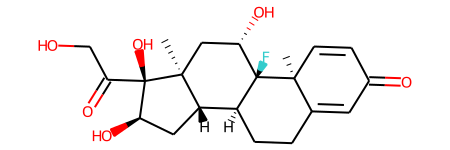

In [11]:
mols[0]

In [12]:
fps = [ Chem.RDKFingerprint(x) for x in mols ]

In [13]:
fps[0].ToBitString()

'100100001000001110000000100001000001011001000001110000001010111010111101100111111100100101001001101010100001010000000100101001100101001001111100011111010100100011110101000101101101000000001011111000111100000100000110000111000100010000111011100011001010100110000000100101010000010001001110101001000011000110011000100011001101000101000001110101000001001100011011010000111101110110100000010010010110111101011110011000001110011100100010010000110000100001010010010010000100110010000100000110100011010110011110011100100101000000100011100011010110100001000001100010011010000010100001000001010000000100001001000101100011110001100111101000010100000001101101110001101100010000100101000000110010001010100010101100000000010001010010100010100011110101011100010100000000010101101111011001000010100000110111001001101001101011001101010101000000000000001001101000001100100110010011010010110101000000111111100100011000111001001000010011000110010100110100000010100001100000100000010110011001010111000100101000001101110

In [14]:
bits = [ list(x.ToBitString()) for x in fps ]

In [15]:
type(bits)

list

In [16]:
# bits[0]

## Step 3) Building a machine learning model to predict activity

In [17]:
X=pd.DataFrame(bits)

In [18]:
X.shape

(10624, 2048)

In [19]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,1,0,0,1,0,0,0,0,1,0,...,1,0,1,1,0,0,0,0,0,1
1,1,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
2,1,0,0,0,0,0,1,0,1,0,...,1,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1


In [20]:
Y=df['class']

In [21]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [22]:
X.shape, Y.shape

((10624, 2048), (10624,))

## Splitting dataset

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, stratify=Y )

In [25]:
Y_train[Y_train==1].shape, Y_train[Y_train==0].shape

((4250,), (4249,))

In [26]:
Y_test[Y_test==1].shape, Y_test[Y_test==0].shape
# แสดงว่า stratify มีผล

((1062,), (1063,))

In [27]:
from sklearn import tree

### Building Decision Tree Model

In [28]:
clf=tree.DecisionTreeClassifier()

In [29]:
clf=clf.fit(X_train, Y_train)

### Using the Model for Prediction

In [30]:
Y_train_pred = clf.predict(X_train)

In [31]:
Y_train_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

### Performance evaluation

In [48]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import scikitplot as skplt

In [49]:
print( confusion_matrix(Y_train, Y_train_pred) )
print( classification_report(Y_train, Y_train_pred) )

[[4244    5]
 [ 265 3985]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4249
           1       1.00      0.94      0.97      4250

    accuracy                           0.97      8499
   macro avg       0.97      0.97      0.97      8499
weighted avg       0.97      0.97      0.97      8499



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

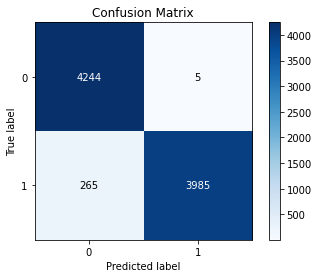

In [50]:
skplt.metrics.plot_confusion_matrix(Y_train, Y_train_pred)

### Testing our model with test dataset

In [34]:
Y_test_pred = clf.predict(X_test)

In [35]:
print( confusion_matrix(Y_test, Y_test_pred) )
print( classification_report(Y_test, Y_test_pred) )

[[725 338]
 [327 735]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.69      1063
           1       0.68      0.69      0.69      1062

    accuracy                           0.69      2125
   macro avg       0.69      0.69      0.69      2125
weighted avg       0.69      0.69      0.69      2125



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

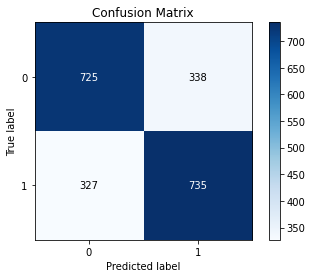

In [51]:
skplt.metrics.plot_confusion_matrix(Y_test, Y_test_pred)

In [36]:
print( accuracy_score(Y_test, Y_test_pred) )

0.6870588235294117


In [39]:
all600=pd.read_csv('all600.csv', header=0)
all600

,Unnamed: 0,class,CID,smiles
0,1,1,1001,CCCCCCCCCCCCCC[C@H](C(=O)N[C@H]([C@@H](/C=C/CC...
1,2,1,1002,CCCCCCCCCCCCCCCC[C@H](C(=O)N[C@H]([C@@H](/C=C/...
2,3,1,1003,OC(=O)CC[Ge](=O)O[Ge](=O)CCC(=O)O
3,4,1,9999,CCCCCCCCCC
4,5,1,1005,OC/C(=C/CC[C@H]([C@H]1CC[C@@]2([C@]1(C)CC=C1C2...
...,...,...,...,...
595,596,1,999999,CCCCCCC
596,597,1,999999,CCCCCCC
597,598,1,999999,CCCCCCC
598,599,1,999999,CCCCCCC


In [40]:
new_mols = [ Chem.MolFromSmiles(x) for x in all600['smiles'] ]
new_fps = [ Chem.RDKFingerprint(x) for x in new_mols ]
new_bits = [ list(x.ToBitString()) for x in new_fps  ]
all600_input = pd.DataFrame(new_bits)
all600_input

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,1,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,1,0,0,1
1,1,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,1,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
all600_pred = clf.predict(all600_input)
all600_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [42]:
all600["predict"] = all600_pred
all600

,Unnamed: 0,class,CID,smiles,predict
0,1,1,1001,CCCCCCCCCCCCCC[C@H](C(=O)N[C@H]([C@@H](/C=C/CC...,1
1,2,1,1002,CCCCCCCCCCCCCCCC[C@H](C(=O)N[C@H]([C@@H](/C=C/...,1
2,3,1,1003,OC(=O)CC[Ge](=O)O[Ge](=O)CCC(=O)O,1
3,4,1,9999,CCCCCCCCCC,0
4,5,1,1005,OC/C(=C/CC[C@H]([C@H]1CC[C@@]2([C@]1(C)CC=C1C2...,0
...,...,...,...,...,...
595,596,1,999999,CCCCCCC,0
596,597,1,999999,CCCCCCC,0
597,598,1,999999,CCCCCCC,0
598,599,1,999999,CCCCCCC,0


In [43]:
all600_count = all600.groupby(["predict"]).count()
all600_count

,Unnamed: 0,class,CID,smiles
predict,,,,
0,254,254,254,254
1,346,346,346,346


In [52]:
all600 = all600[["CID","predict"]]
all600.to_csv('all600_pred.csv', index=False)